<a href="https://colab.research.google.com/github/anh-honcharuk/Neural-Networks/blob/main/sem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Припустимо, що у вас є багатошаровий персептрон, що складається з одного
вхідного шару з 10 нейронами, за яким є ще один прихований шар з 50
нейронами і один вихідний шар з 3 нейронами. Всі штучні нейрони
застосовують функцію активації ReLU.
1.  Яка форма вхідної матриці Х? - **10x1**
2. Що можна сказати (1) про форму вектора ваг Wh прихованого шару і (2) формі його вектора зсувів bh? - **(1) 50x10 i (2) 50x1**
3. Яка (1) форма вектора ваг W0 вихідного шару і (2) форма його вектора зсувів b0? - **(1) 3x50 i (2) 3x1**
4. Яка форма вихідної матриці Y мережі? - **3x1**
5. Напишіть рівняння, яке обчислює вихідну матрицю Y мережі як функцію
Х, Wh, bh, W0 і b0.
  **Y = ReLU(W0 * ReLU(Wh * X - bh) - b0)**

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
import time

import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf

import keras.layers as lay
import keras.backend as back
import keras.models as mod
from keras.datasets import mnist

In [ ]:
(x_, y_), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

2. Порівняйте точність класифікації нейронної мережі з різними нелінійними
функціями активації з точністю класифікації нейронної мережі з лінійною
функцією активації.

---
**Точність класифікації нейронної мережі з лінійною функцією активації значно нижча за точність класифікації нейронної мережі з різними нелінійними функціями активації**


In [ ]:
def neuro(number, lay_, activ):
  
  y_train_oh = keras.utils.to_categorical(y_, 10)
  y_val_oh = keras.utils.to_categorical(y_val, 10)
  back.clear_session()

  model = mod.Sequential()
  model.add(lay.Dense(number, activation=activ))

  for i in range(0, lay_):
    model.add(lay.Dense(10, activation=activ))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  x_train_float = x_.astype(np.float) / 255 - 0.5
  x_val_float = x_val.astype(np.float) / 255 - 0.5
  t = time.time()

  results = model.fit(x_train_float.reshape(-1, 28*28), y_train_oh, batch_size=64, epochs=10, validation_data=(x_val_float.reshape(-1, 28*28), y_val_oh), verbose=0)
  #print('Точність класифікації:', np.mean(results.history['val_accuracy']), '\nЧас виконання:', time.time() - t, '\n')
  return np.mean(results.history['val_accuracy']), time.time() - t


In [ ]:
activ =['softmax', 'softplus', 'linear', 'sigmoid']

for act in activ:
  a, t = neuro(100, 1, act)
  print(act)
  print(a) 

softmax
0.7427400052547455
softplus
0.8599900066852569
linear
0.11028999984264373
sigmoid
0.8599699914455414


3. Для двошарової нейронної мережі з фіксованою функцією активації побудуйте
графік залежності часу навчання нейронної мережі і точності класифікації від
кількості нейронів в прихованому шарі мережі.

In [ ]:
neurons = [1, 3, 5, 10, 15, 20, 25, 50, 75, 100, 250, 500, 1000]
time_ = []
acc_ = []
for n in neurons:
  a, t = neuro(n, 1, 'softplus')
  time_.append(t)
  acc_.append(a)

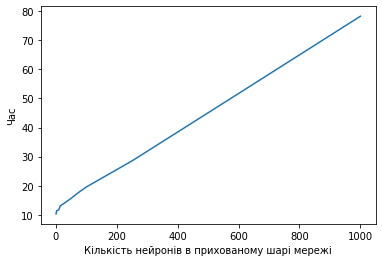

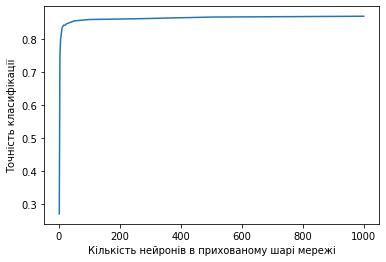

In [ ]:
plt.plot(neurons, time_)
plt.xlabel('Кількість нейронів в прихованому шарі мережі')
plt.ylabel('Час')
plt.show()

plt.plot(neurons, acc_)
plt.xlabel('Кількість нейронів в прихованому шарі мережі')
plt.ylabel('Точність класифікації')
plt.show()


4. Побудуйте графік залежності часу навчання нейронної мережі і точності
класифікації від кількості прихованих шарів (всі приховані шари однакового
розміру) для багатошарової нейронної мережі з фіксованою функцією активації.

In [ ]:
lay_ = [1, 3, 5, 10, 15, 30, 100]

time_l = []
acc_l = []
for l in lay_:
  a_, t_ = neuro(50, l, 'softplus')
  time_l.append(t_)
  acc_l.append(a_)

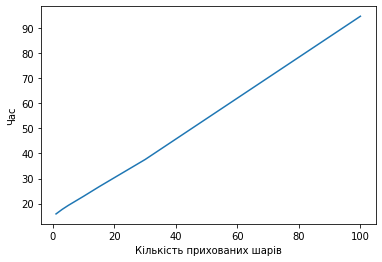

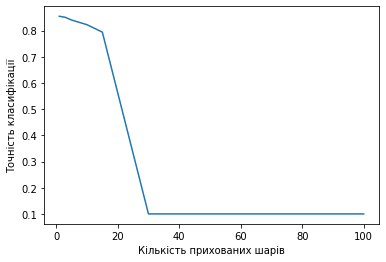

In [ ]:
plt.plot(lay_, time_l)
plt.xlabel('Кількість прихованих шарів')
plt.ylabel('Час')
plt.show()

plt.plot(lay_, acc_l)
plt.xlabel('Кількість прихованих шарів')
plt.ylabel('Точність класифікації')
plt.show()